K mean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Gender  Height  Weight  Index  Cluster
0    Male     174      96      4        2
1    Male     189      87      2        2
2  Female     185     110      4        2
3  Female     195     104      3        2
4    Male     149      61      3        1
5    Male     189     104      3        2
6    Male     147      92      5        3
7    Male     154     111      5        3
8    Male     174      90      3        3
9  Female     169     103      4        3


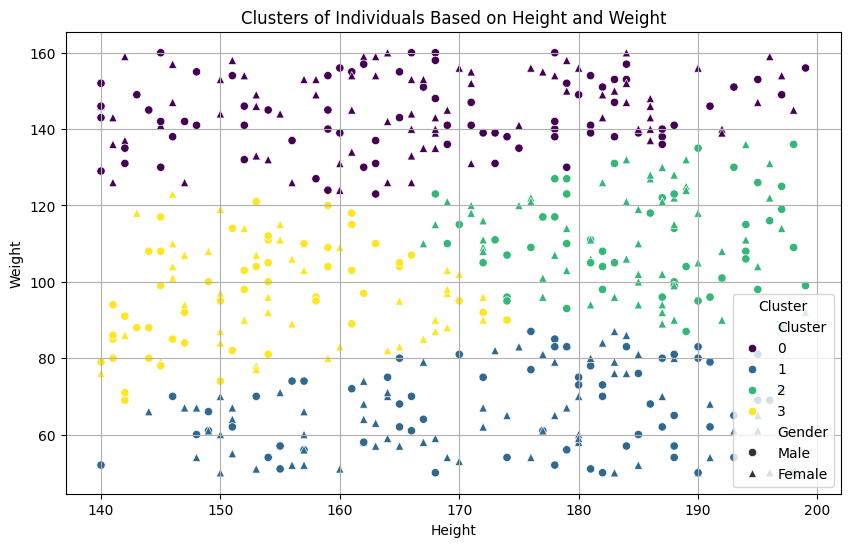

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/bmi.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Prepare the data for clustering (excluding the 'Gender' column)
X = df[['Height', 'Weight', 'Index']]

# Using an arbitrary choice of 4 clusters for demonstration purposes
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Show the first few rows of the dataframe with the cluster assignment
print(df.head(10))

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the clusters
sns.scatterplot(data=df, x='Height', y='Weight', hue='Cluster', palette='viridis', style='Gender', markers=['o', '^'])

plt.title('Clusters of Individuals Based on Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [7]:
from sklearn.cluster import DBSCAN

# The eps and min_samples parameters are chosen for demonstration purposes
# and may need adjustment for optimal clustering results
dbscan = DBSCAN(eps=15, min_samples=2).fit(X)

# Add the DBSCAN cluster labels to the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Show the first few rows of the dataframe with the DBSCAN cluster assignment
df.head(10)

,Gender,Height,Weight,Index,Cluster,DBSCAN_Cluster
0,Male,174,96,4,2,0
1,Male,189,87,2,2,0
2,Female,185,110,4,2,0
3,Female,195,104,3,2,0
4,Male,149,61,3,1,0
5,Male,189,104,3,2,0
6,Male,147,92,5,3,0
7,Male,154,111,5,3,0
8,Male,174,90,3,3,0
9,Female,169,103,4,3,0


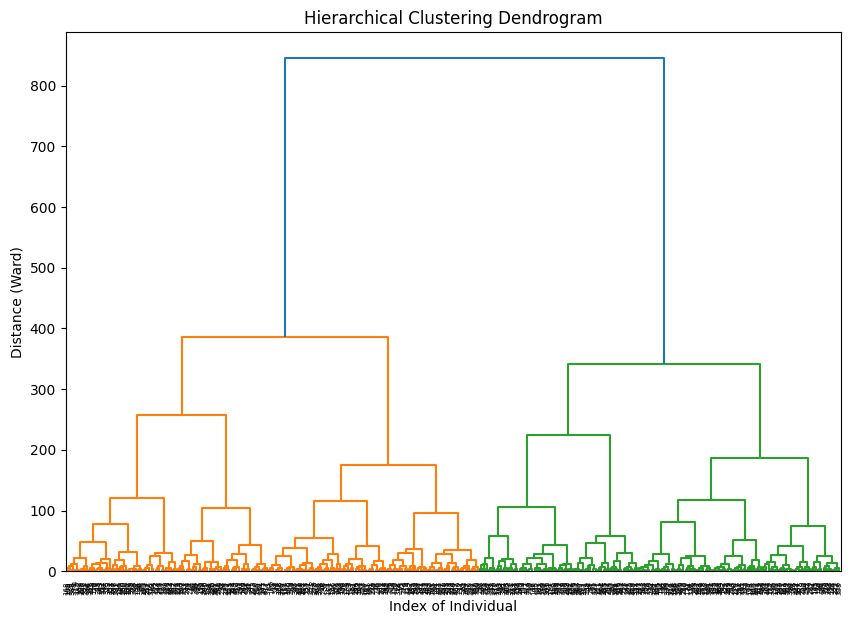

In [8]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

data = pd.read_csv('/content/bmi.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Prepare the data for clustering (excluding the 'Gender' column)
X = df[['Height', 'Weight', 'Index']]

# Apply hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index.astype(str), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index of Individual')
plt.ylabel('Distance (Ward)')
plt.show()
